In [ ]:
# Import libraries and connect to Google Drive:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skm
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Path to your main folder containing 'Female' and 'Male'
main_path = Path('/content/drive/MyDrive/genderRecognition/mel_spectograms')

# Access the processed database:
%cd /content/drive/MyDrive/genderRecognition/mel_spectograms
dir='/content/drive/MyDrive/genderRecognition/mel_spectograms'
elements = os.listdir(dir)

IMG_SIZE1 = 582
IMG_SIZE2 = 222

counter = 0
y = []
con = 0
for folder in elements:
    dir_folder = dir + '/' + folder
    file_list = os.listdir(dir_folder)
    y = y + [int(folder)] * len(file_list)
    for file in file_list:
        image_path = dir_folder + '/' + file
        # Load the processed image:
        im = cv2.imread(image_path)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im, (582, 222))
        im = im.reshape(582, 222, 1)
        # x = np.array(im).flatten()
        counter = counter + 1
        print(counter)
        if con == 0:
            X = np.expand_dims(im, axis=0)
        else:
            X = np.concatenate((X, np.expand_dims(im, axis=0)), axis=0)
        con += 1
Y = np.array(y)

/content/drive/MyDrive/genderRecognition/mel_spectograms
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=None)

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy LR: 0.7737789203084833


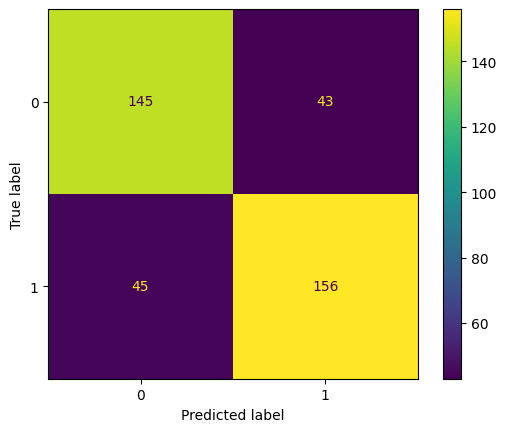

In [ ]:
# Logistic Regression (LR):

# Training:

# Create a logistic regression model and fit it with the training data:
lr_model = LogisticRegression()
lr_model.fit(X_train_flattened, y_train)

# Validation:

# Use the LR model to make predictions on the test data:
predictions = lr_model.predict(X_test_flattened)

# Evaluate the performance of the LR model:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy LR:", accuracy)

# Confusion Matrix:
cm = skm.confusion_matrix(y_test, predictions)
disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()

Accuracy RF: 0.7455012853470437


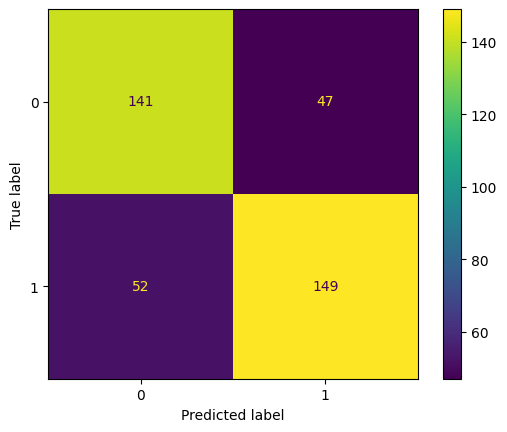

In [ ]:
# Random Forest (RF):

# Training:

# Create a random forest (RF) model and fit it with the training data:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flattened, y_train)

# Validation:

# Use the RF model to make predictions on the test data:
predictions = rf_model.predict(X_test_flattened)

# Evaluate the performance of the RF model:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy RF:", accuracy)

# Confusion Matrix:
cm = skm.confusion_matrix(y_test, predictions)
disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()


Accuracy K-NN: 0.7326478149100257


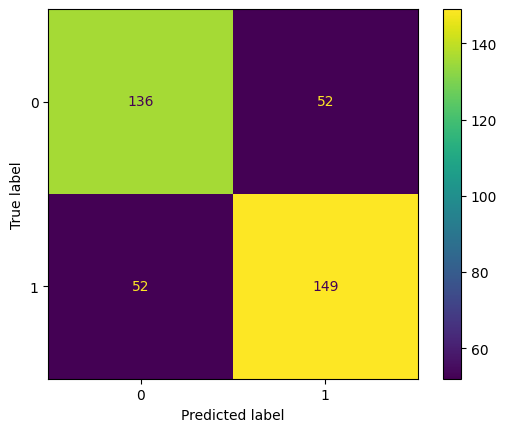

In [ ]:
# Training:

# Create a K-NN model and fit it with the training data:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_flattened, y_train)

# Validation:

# Use the K-NN model to make predictions on the test data:
predictions = knn_model.predict(X_test_flattened)

# Evaluate the performance of the K-NN model:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy K-NN:", accuracy)

# Confusion Matrix:
cm = skm.confusion_matrix(y_test, predictions)
disp = skm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
